### <center>Лабораторна робота №0. <br> Використання основних функцій бібліотек візуального аналізу</center>

**Повторіть лекцій матеріал слідуючи інструкціям**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
!ls gdrive/'My Drive'/TEACHING/IntroDataScience/intro_to_data_science/Lab_3_4/data	

howpop_train.csv  telecom_churn.csv  titanic_train.csv


In [ ]:
# шлях до папки з даними на моєму google drive, відредагуйте згідно вашого випадку
data_folder = "gdrive/My Drive/TEACHING/IntroDataScience/intro_to_data_science/Lab_3_4/data" 

In [2]:
#df = pd.read_csv('data/telecom_churn.csv')
data_folder = 'data'
df = pd.read_csv(data_folder+'/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Візуалізація характеристик ознак по одній 
## 1.1. Кількісні
Гістограма і боксплот

<AxesSubplot:>

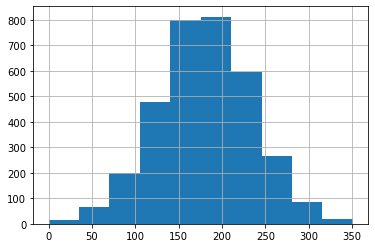

In [4]:
df['Total day minutes'].hist()

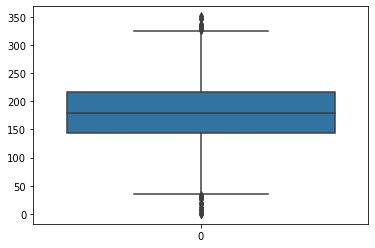

In [11]:
sns.boxplot(data = df['Total day minutes']);

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

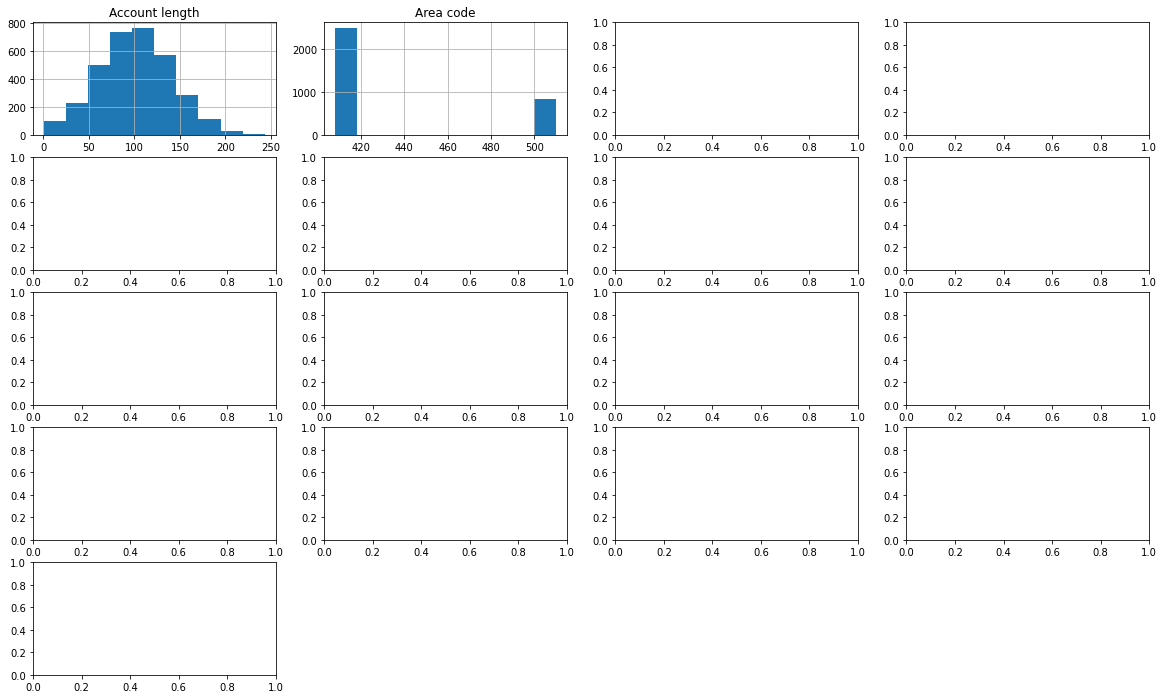

In [ ]:
df.hist()

# 1.2. Категоріальні
countplot

In [7]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [8]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

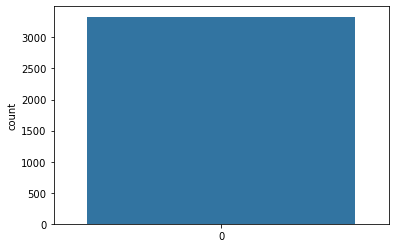

In [10]:
sns.countplot(data = df['Churn']);

In [13]:
sns.countplot(data = df['State']);

ValueError: could not convert string to float: 'KS'

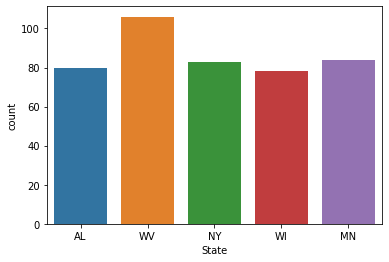

In [ ]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

# 2. Взаємодія ознак
## 2.1. Кількісна з кількісною
pairplot, scatterplot, кореляція, heatmap

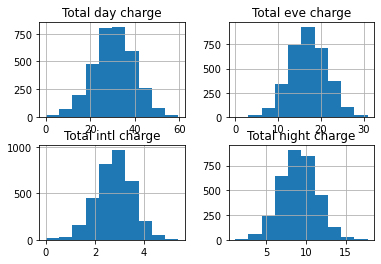

In [ ]:
feat = [f for f in df.columns if 'charge' in f]

df[feat].hist();

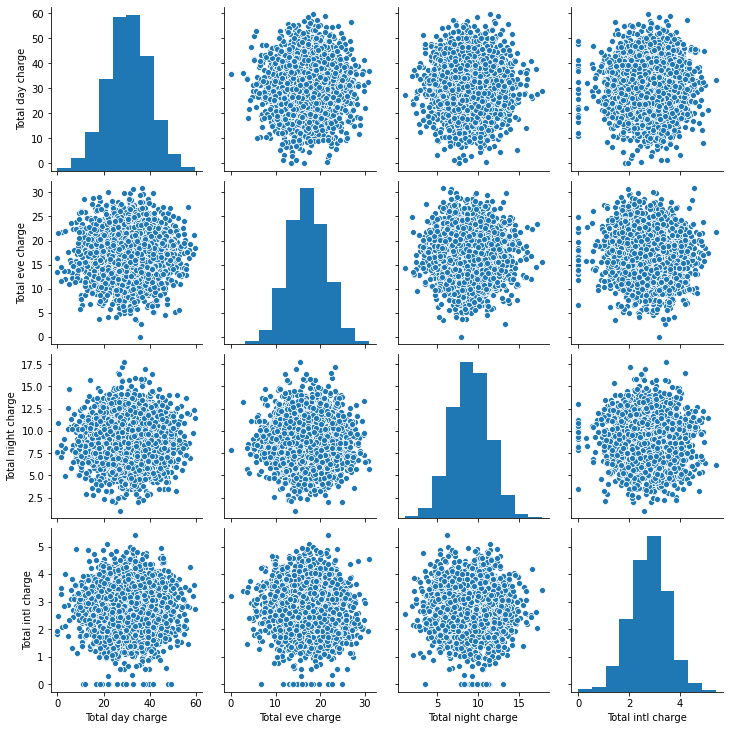

In [ ]:
sns.pairplot(df[feat]);

In [14]:
df['Churn'].map({False: 'blue', True: 'orange'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

In [15]:
df[~df['Churn']].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


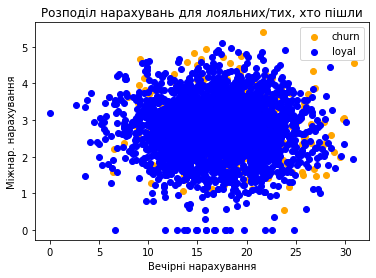

In [16]:
plt.scatter(df[df['Churn']]['Total eve charge'], 
            df[df['Churn']]['Total intl charge'],
           color='orange', label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
           color='blue', label='loyal');
plt.xlabel('Вечірні нарахування');
plt.ylabel('Міжнар. нарахування');
plt.title('Розподіл нарахувань для лояльних/тих, хто пішли');
plt.legend();

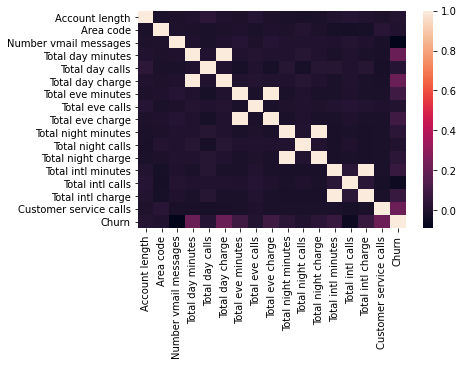

In [17]:
sns.heatmap(df.corr());

In [ ]:
df.drop(feat, axis=1, inplace=True)

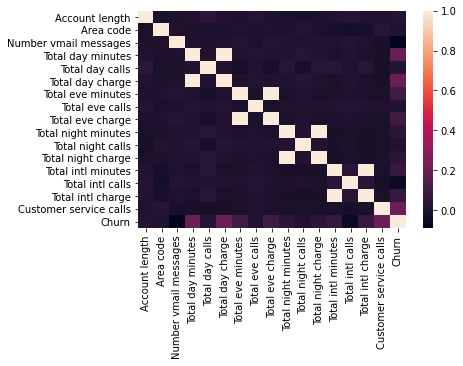

In [ ]:
sns.heatmap(df.corr());

## 2.2.  Кількісний з категоріальним
boxplot, violinplot

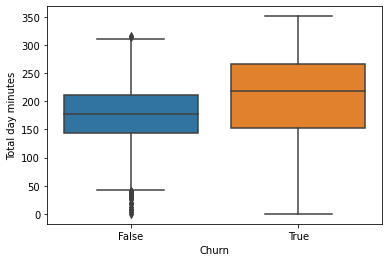

In [ ]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

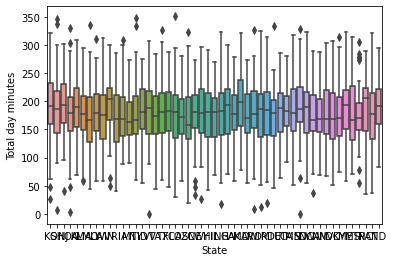

In [ ]:
sns.boxplot(x='State', y='Total day minutes', data=df);

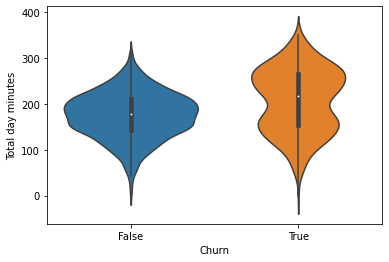

In [ ]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [ ]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

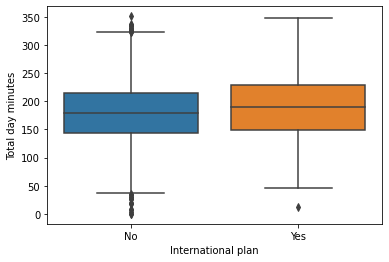

In [ ]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

## 2.3. Категоріальний з категоріальним
countplot

In [ ]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


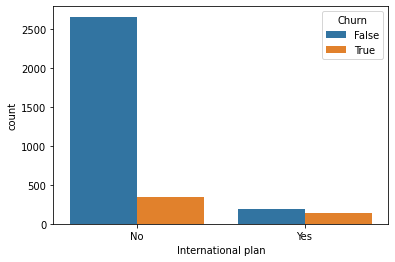

In [ ]:
sns.countplot(x='International plan', hue='Churn', data=df);

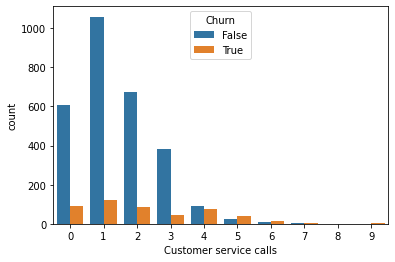

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

## 3. Інше
Manifold learning, один з представників – t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state=0)

In [ ]:
df2 = df.drop(['State', 'Churn'], axis=1)

In [ ]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 
                                                             'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 
                                                             'No': 0})

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [ ]:
%%time
tsne.fit(df2)

CPU times: user 54.1 s, sys: 197 ms, total: 54.3 s
Wall time: 27.9 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=0)

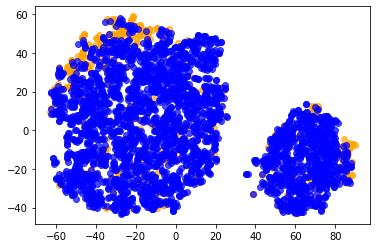

In [ ]:
plt.scatter(tsne.embedding_[df['Churn'].values, 0], 
            tsne.embedding_[df['Churn'].values, 1], 
            color='orange', alpha=.7);
plt.scatter(tsne.embedding_[~df['Churn'].values, 0], 
            tsne.embedding_[~df['Churn'].values, 1], 
            color='blue', alpha=.7);